#### **We have created two models based on the following ideas**

##### **Augmentation**
- For each image we augment 5 more images so that we cab train the model better.

##### **Saving All Embeddings**
- for each trained image we save the embedding
- while evaluating, we parse through all the n embeddings where n is the number of personalities
- In each iteration we select the max cosine score of all embeddings and in the last iteration
- we select atleast 10 people and start calculating average score and frequency score.

In [ ]:
from TrainTestSplitter import TrainTestSplitter
from DataPreparation import DataPreparation
import os

original_data_dir = "../dataset_images"
dataset_dir = "../datasets/FINAL15RESNET5"  # Path to your dataset folder
sample_class_number = 15

data_preparation = DataPreparation(original_data_dir, dataset_dir, sample_class_number)
selected_classes = data_preparation.prepare_data()

# Example Usage:
splitter = TrainTestSplitter(dataset_dir)
splitter.create_train_test_split()

#### **Training**

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 42s 0us/step
Model Shape at Additional Layer 1 (None, 2048)
<KerasTensor shape=(None, None, None, 3), dtype=float32, sparse=False, name=keras_tensor>


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 23,618,447 (90.10 MB)

 Trainable params: 30,735 (120.06 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

None
Found 261 images belonging to 15 classes.
Found 15 images belonging to 15 classes.


c:\Users\DELL\Desktop\Conestoga\AIML\FOML-FinalProject\WhoLooksLikeMe\venv\tensorflow_facenet\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0595 - loss: 3.1243
Epoch 1: val_loss improved from inf to 2.78924, saving model to ../savedmodels/FINAL15RESNET5\best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.0586 - loss: 3.1102 - val_accuracy: 0.0667 - val_loss: 2.7892
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0576 - loss: 2.7693
Epoch 2: val_loss did not improve from 2.78924
9/9 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.0572 - loss: 2.7712 - val_accuracy: 0.0667 - val_loss: 2.7939
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0749 - loss: 2.7286
Epoch 3: val_loss improved from 2.78924 to 2.76625, saving model to ../savedmodels/FINAL15RESNET5\best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.0747 - loss: 2.7298 - val_accuracy: 0.1333 - val_loss: 2.7663
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0698 - loss: 2.7572
Epoch 4: val_loss improved from 2.76625 to 2.75700, saving m

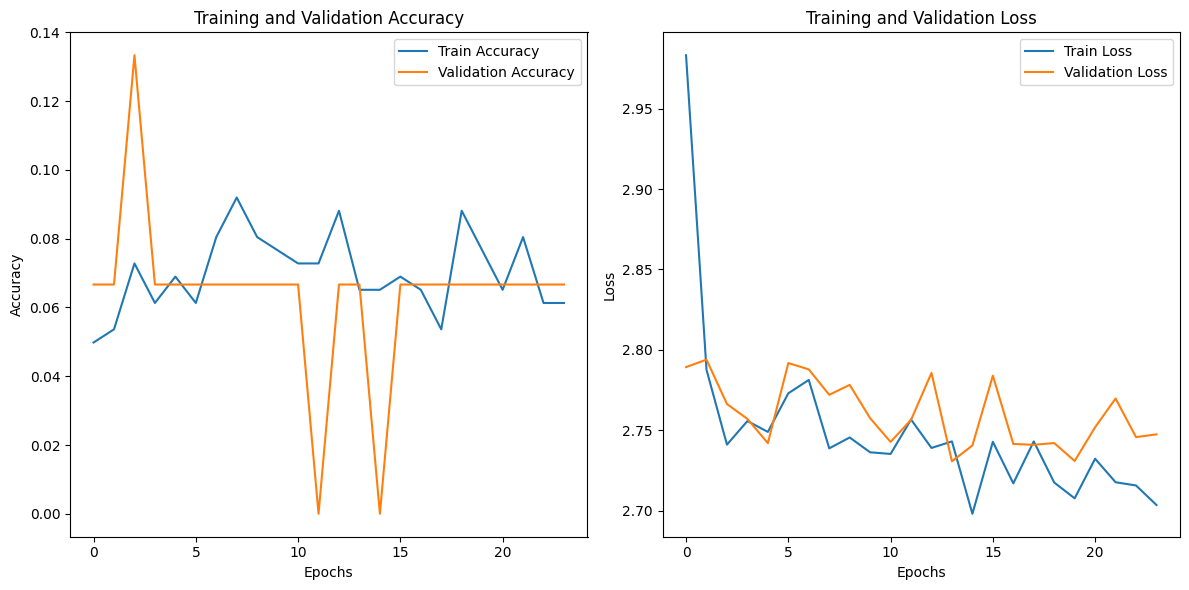

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Classification Report for Output:
 {' America Ferrera': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, ' Anne Hathaway': {'precision': 0.07692307692307693, 'recall': 1.0, 'f1-score': 0.14285714285714285, 'support': 1.0}, ' Anthony Joshua': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, ' Bella Thorne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, ' Brittany Snow': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, ' Florence Pugh': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, ' Hayley Atwell': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, ' Jack Whitehall': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, ' Jon Bernthal': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, ' Julia Stiles': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, ' Luke Perry': {'precision': 0.0, '

c:\Users\DELL\Desktop\Conestoga\AIML\FOML-FinalProject\WhoLooksLikeMe\venv\tensorflow_facenet\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\Desktop\Conestoga\AIML\FOML-FinalProject\WhoLooksLikeMe\venv\tensorflow_facenet\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\Desktop\Conestoga\AIML\FOML-FinalProject\WhoLooksLikeMe\venv\tensorflow_facenet\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0

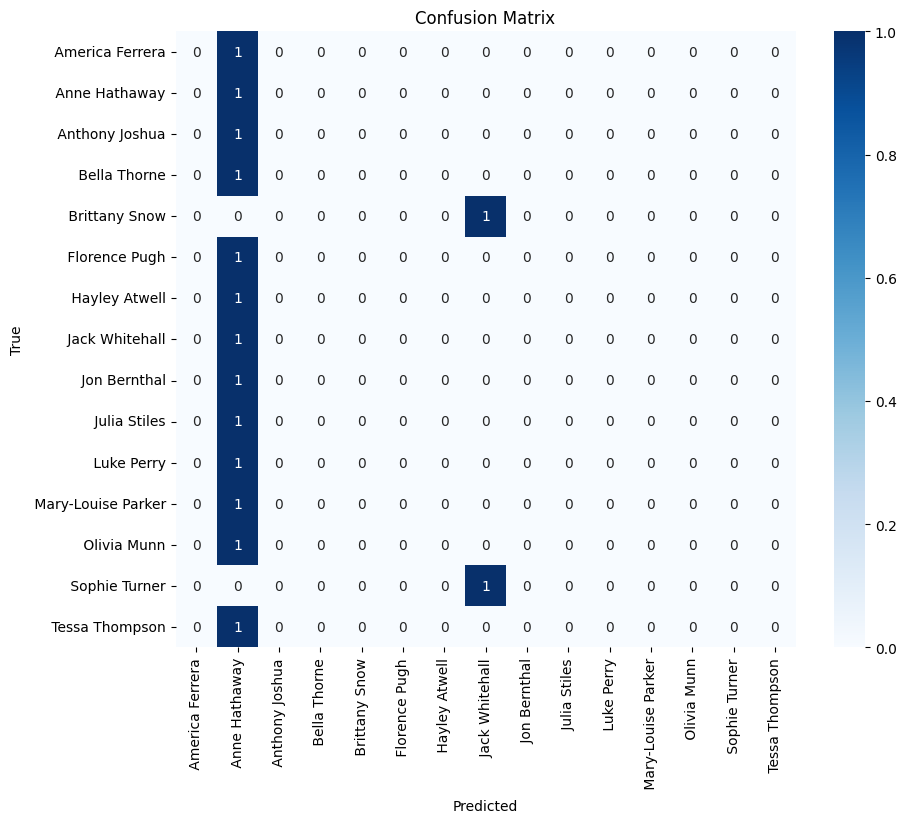

Generating embeddings for dataset in ../datasets/FINAL15RESNET5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Folder name :  America Ferrera :: Embedding Shape : (1, 2048)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━

In [1]:
from FINAL5ResNet50SingleHead import ResNet50SingleHead
dataset_dir = "../datasets/FINAL15RESNET5"  # Path to your dataset folder

model = ResNet50SingleHead(dataset_dir)

# Step 3: Evaluate the model using the embeddings and test folder
model.train_model(epochs=100, batch_size=32)
model.create_embeddings_for_personality(data_dir=dataset_dir, save_embeddings_dir="../embeddings/Final5-RESNET-15")

#### **Similarity Calculation using Embedding**

In [2]:
from Final5SimilarityCalculatorAdvancedCorrected2 import SimilarityCalculatorAdvancedCorrected2
from FINALModelLoaderHelper import ModelLoader

modelLoader = ModelLoader("../savedmodels/FINAL15RESNET5/best_model.keras")
embedding_dir = "../embeddings/Final5-RESNET-15"
similarity_calculator = SimilarityCalculatorAdvancedCorrected2(embedding_dir)
similarity_calculator.calculate_similarity(test_image_path="../test_image/olivia.jpg", model=modelLoader.embedding_model)


Embedding model created using layer: 'embedding'.
../test_image/olivia.jpg
Total Remaining : 15
Binary Search till 3
Augmented shape : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Augmented shape : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Augmented shape : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Augmented shape : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
Augmented shape : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Augmented shape : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
Augmented shape : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Augmented shape : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Augmented shape : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Augmented shape : (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
*****************************************************
*****************************************************
Average scores: 
{' America Ferrera': 0.8556574513162916, ' Anne Hat

([(' Luke Perry', 0.8615645704917607),
  (' Florence Pugh', 0.8599539900877382),
  (' Anthony Joshua', 0.8597072777311292),
  (' Jon Bernthal', 0.8595918298871708),
  (' Jack Whitehall', 0.8584666225288196),
  (' Julia Stiles', 0.8582830418878824),
  (' Tessa Thompson', 0.8582409027611053),
  (' Olivia Munn', 0.8581180588970978),
  (' Anne Hathaway', 0.8578774673318976),
  (' Bella Thorne', 0.8576370225333909),
  (' Mary-Louise Parker', 0.8568444749595245),
  (' Brittany Snow', 0.8563625097055667),
  (' Sophie Turner', 0.8560510005819018),
  (' Hayley Atwell', 0.8557432091450687),
  (' America Ferrera', 0.8556574513162916)],
 [(' Luke Perry', 150),
  (' Florence Pugh', 140),
  (' Anthony Joshua', 130),
  (' Jon Bernthal', 120),
  (' Jack Whitehall', 110),
  (' Julia Stiles', 100),
  (' Tessa Thompson', 90),
  (' Olivia Munn', 80),
  (' Anne Hathaway', 70),
  (' Bella Thorne', 60),
  (' Mary-Louise Parker', 50),
  (' Brittany Snow', 40),
  (' Sophie Turner', 30),
  (' Hayley Atwell', 20

In [ ]:
similarity_calculator.calculate_similarity(test_image_path="../test_image/jon.jpg", model=modelLoader.embedding_model)


In [ ]:
similarity_calculator.calculate_similarity(test_image_path="../test_image/luke.jpg", model=modelLoader.embedding_model)


In [ ]:
similarity_calculator.calculate_similarity(test_image_path="../test_image/florence.jpg", model=modelLoader.embedding_model)


In [ ]:
similarity_calculator.calculate_similarity(test_image_path="../test_image/brittany.jpg", model=modelLoader.embedding_model)


In [ ]:
similarity_calculator.calculate_similarity(test_image_path="../test_image/brittany2.jpg", model=modelLoader.embedding_model)


In [ ]:
similarity_calculator.calculate_similarity(test_image_path="../test_image/bella.jpg", model=modelLoader.embedding_model)


In [ ]:
similarity_calculator.calculate_similarity(test_image_path="../test_image/sophie.jpg", model=modelLoader.embedding_model)


In [ ]:
similarity_calculator.calculate_similarity(test_image_path="../test_image/anthony.jpg", model=modelLoader.embedding_model)


In [ ]:
from Final4SimilarityCalculatorAdvancedCorrected2 import SimilarityCalculatorAdvancedCorrected2
from FINALModelLoaderHelper import ModelLoader

modelLoader = ModelLoader("../savedmodels/FINAL15V4/best_model.keras")
embedding_dir = "../embeddings/Final4-15"
similarity_calculator = SimilarityCalculatorAdvancedCorrected2(embedding_dir)
similarity_calculator.calculate_similarity(test_image_path="../test_image/bella.jpg", model=modelLoader.embedding_model, num_iterations=100)


In [ ]:
similarity_calculator.calculate_similarity(test_image_path="../test_image/sophie.jpg", model=modelLoader.embedding_model)


In [ ]:
similarity_calculator.calculate_similarity(test_image_path="../test_image/sophie.jpg", model=modelLoader.embedding_model, num_iterations=100)
